# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dropped 18 columns;
 ['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


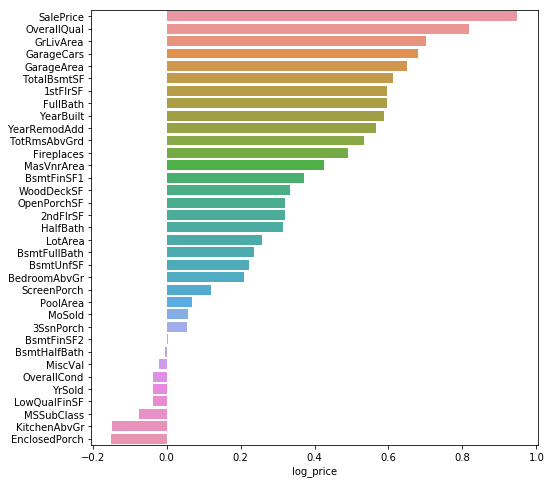

SalePrice       0.9484
OverallQual     0.8172
GrLivArea       0.7009
GarageCars      0.6806
GarageArea      0.6509
TotalBsmtSF     0.6121
1stFlrSF        0.5970
FullBath        0.5948
YearBuilt       0.5866
YearRemodAdd    0.5656
TotRmsAbvGrd    0.5344
Fireplaces      0.4894
MasVnrArea      0.4268
BsmtFinSF1      0.3720
Name: log_price, dtype: float64


'35 features'

In [1]:
#!pip install seaborn --upgrade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('chop_threshold', 0.001)
pd.set_option('precision',4)


# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")
# Log the price
df['log_price'] = np.log(df['SalePrice'])
salePrice = df["SalePrice"]
df = df.drop(['Id'], axis=1)

# Fill NaN's that are fillable. 
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# Drop other NaN's 
nan_columns = df.columns[df.isna().any()].tolist()
df = df.drop(nan_columns, axis=1)
print(f"Dropped {len(nan_columns)} columns;\n {nan_columns}")

# Create a correlation matrix and then sort and compare.
correlation_matrix = df.corr()
corr_rank = correlation_matrix.sort_values('log_price', ascending=False)
plt.figure(figsize=(8,8))        
ax = sns.barplot(corr_rank.log_price[1:], corr_rank.index[1:], orient='h')
plt.show()
print(corr_rank.log_price[1:15])

# Get a sorted list of all corrilated variables. 
corr = pd.DataFrame(corr_rank.log_price[1:])
corr = corr[corr.log_price > -1].T
corr_list = corr.columns.values.tolist()
(f"{len(corr_list)} features")

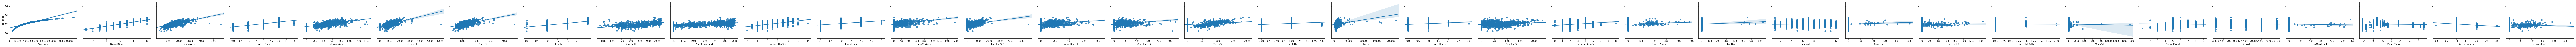

In [2]:
# plot some Reg plots to check all these out! 

g = sns.pairplot(data=df, y_vars=['log_price'], x_vars=corr_list, kind="reg", height=3, aspect=1.5)


## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [3]:
# Get a sorted list of postively corrilated variables. 
print(df.shape)
corr = pd.DataFrame(corr_rank.log_price[0:])
corr = corr[corr.log_price > 0.4260].T
corr_list = corr.columns.values.tolist()

df = df[corr_list]
print(df.shape)
df.head(2)

(1460, 63)
(1460, 14)


,log_price,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea
0,12.2477,208500,7,1710,2,548,856,856,2,2003,2003,8,0,196.0
1,12.1090,181500,6,1262,2,460,1262,1262,2,1976,1976,6,1,0.0


In [4]:
#Use Statsmodels to run a regression

X = df[corr_list].drop(['log_price','SalePrice'], axis=1)
y = df['SalePrice']
print( X.head(1))

print (f"X shape: {X.shape}")
print (f"y shape: {y.shape}")

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

   OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  Fireplaces  MasVnrArea
0            7       1710           2         548          856       856         2       2003          2003             8           0       196.0
X shape: (1460, 12)
y shape: (1460,)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     433.1
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:12:43   Log-Likelihood:                -17431.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1447   BIC:                         3.496e+04
Df Model:                          12  

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

"A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable."

The P-values for my data are all lower than .05 with the exception of the `FullBath, 1st Flr SF,& MasVnrArea` Because the P values are low I can reject the null hypothesis and determine that these are indeed corrilating with my model. 

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [5]:
# # Lets remove outliers 
X = df[corr_list].drop(['log_price'], axis=1)
print(X.shape)
X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
print(X.shape)

#Use Statsmodels to run a regression
y = X['SalePrice']
X = X.drop(['SalePrice'], axis=1)
print (f"X shape: {X.shape}")
print (f"y shape: {y.shape}")

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

(1460, 13)
(1382, 13)
X shape: (1382, 12)
y shape: (1382,)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     549.8
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:12:43   Log-Likelihood:                -16053.
No. Observations:                1382   AIC:                         3.213e+04
Df Residuals:                    1369   BIC:                         3.220e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Looks like GarageCars, Full bath, Total Rooms Abv Ground, and Fireplaces moved the most. Huge standard errors now. 

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [6]:
X = df[corr_list].drop(['log_price','SalePrice'], axis=1)
y = df['log_price']

#Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     592.9
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:12:43   Log-Likelihood:                 566.49
No. Observations:                1460   AIC:                            -1107.
Df Residuals:                    1447   BIC:                            -1038.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1972      0.564      3.899   

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea'], dtype='object') 


[17055.91121067528, 2.8471559665636303, 5.367976773113568, 5.313132393504441, 5.0007422352807955, 3.6234004933763564, 3.767688904242778, 2.245531740079542, 2.3999841415514056, 1.7922915088901197, 3.3768726806482614, 1.4130890264352536, 1.3358780640080148]


None of my variables are highly multi-colinear. 

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

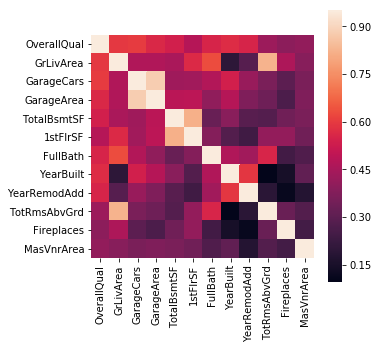

In [8]:
# Check the Corrilation Matrix
no_const = X.drop('const', axis=1)
corr_matrix = no_const.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_matrix, vmax=.95, square=True);

## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

Noticable reduction in the standard errors of the collinear variables.

In [9]:
# Dropping more colinear variable just to see what happens.
X = X.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'], axis=1)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     785.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:12:43   Log-Likelihood:                 561.11
No. Observations:                1460   AIC:                            -1102.
Df Residuals:                    1450   BIC:                            -1049.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3796      0.560      4.246   

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [10]:
X = df[corr_list].drop(['log_price','SalePrice'], axis=1)
y = df['log_price']

#Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)


# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function
# Log-Linear Regression
# This is like using np.ones to add a vector of ones

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     440.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:12:43   Log-Likelihood:                 566.49
No. Observations:                1460   AIC:                            -1107.
Df Residuals:                    1447   BIC:                            -1038.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1972      0.692      3.174   

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

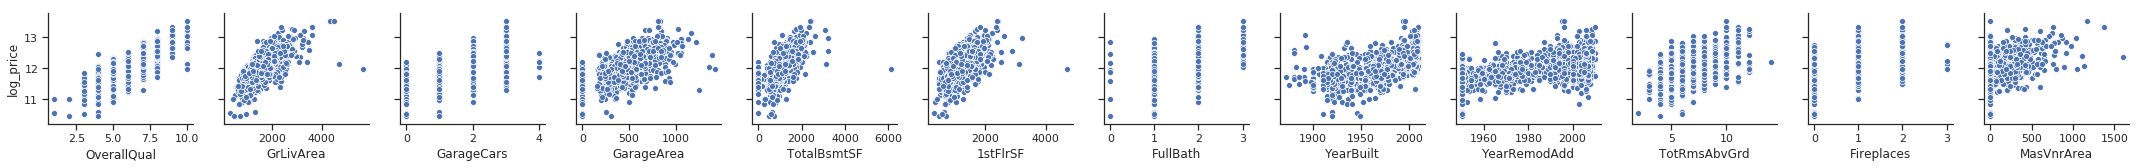

In [11]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = X.columns.drop('const')

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['log_price'], x_vars=x_columns)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

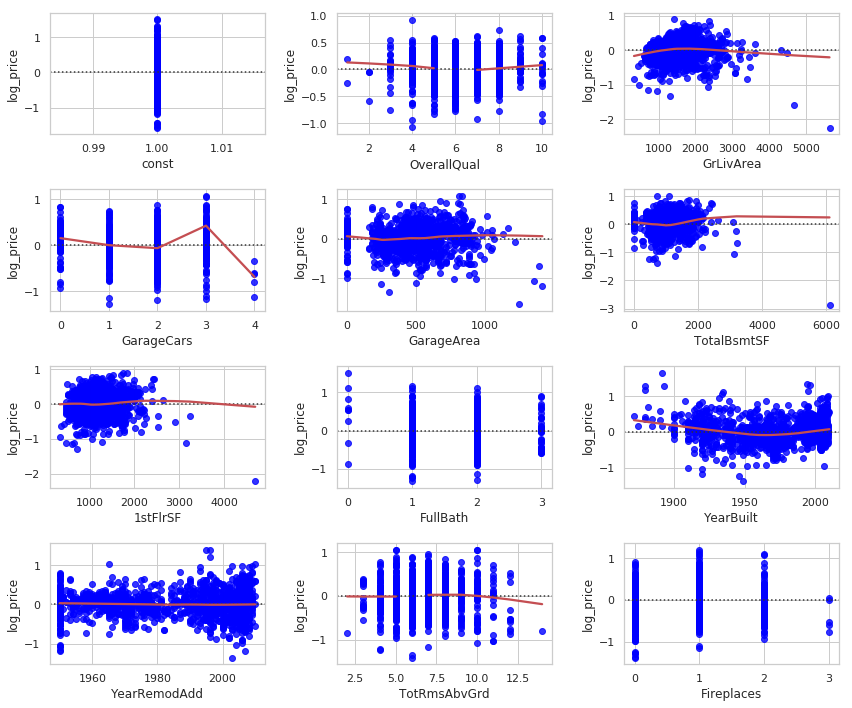

In [12]:
# There are 12 columns in X
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(12,10));

# Positions in the array of axes that I just made
position_list = []
for i in range(4):
    for j in range(3):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'})
plt.tight_layout()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [13]:
print(X.head(1))
X['1stFlrSF_squared'] = X['1stFlrSF']**2
X['YearBuilt_squared'] = X['YearBuilt']**2
X['TotalBsmtSF_squared'] = X['TotalBsmtSF']**2
X['GrLivArea_squared'] = X['GrLivArea']**2
X['GarageArea_squared'] = X['GarageArea']**2

X = X.drop(['1stFlrSF','YearBuilt','TotalBsmtSF','GrLivArea','GarageArea'], axis=1)

   const  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  Fireplaces  MasVnrArea
0    1.0            7       1710           2         548          856       856         2       2003          2003             8           0       196.0


In [14]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function
# Log-Linear Regression
# This is like using np.ones to add a vector of ones

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     403.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:13:39   Log-Likelihood:                 485.46
No. Observations:                1460   AIC:                            -944.9
Df Residuals:                    1447   BIC:                            -876.2
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1272    